# MNIST digits recognition

This a simple model trained on MNIST digits dataset with a gpu

In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9601549046577745206, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4962497331
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8242707709201960056
 physical_device_desc: "device: 0, name: GeForce GTX 980 Ti, pci bus id: 0000:02:00.0, compute capability: 5.2"]

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## Preparing the data

In [3]:
import keras
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Constructing the model
![](images/graph_mnist.png)

In [4]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard

# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#Train model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Logs
logs = TensorBoard()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [logs])

score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.2606 - acc: 0.9197 - val_loss: 0.0637 - val_acc: 0.9796
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0898 - acc: 0.9731 - val_loss: 0.0423 - val_acc: 0.9859
Epoch 3/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0684 - acc: 0.9795 - val_loss: 0.0396 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0566 - acc: 0.9828 - val_loss: 0.0320 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0459 - acc: 0.9866 - val_loss: 0.0301 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0300 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0385 - acc: 0.9887 - val_loss: 0.0281 - val_acc

In [5]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031132560645475676
Test accuracy: 0.9904


## Logs of the training

Thanks to tensorboard we can log the training of our model, at each batch a point is saved and we can visualize it on a tensorboard html file created by tensorboard localy.

We can also export this data in csv files.

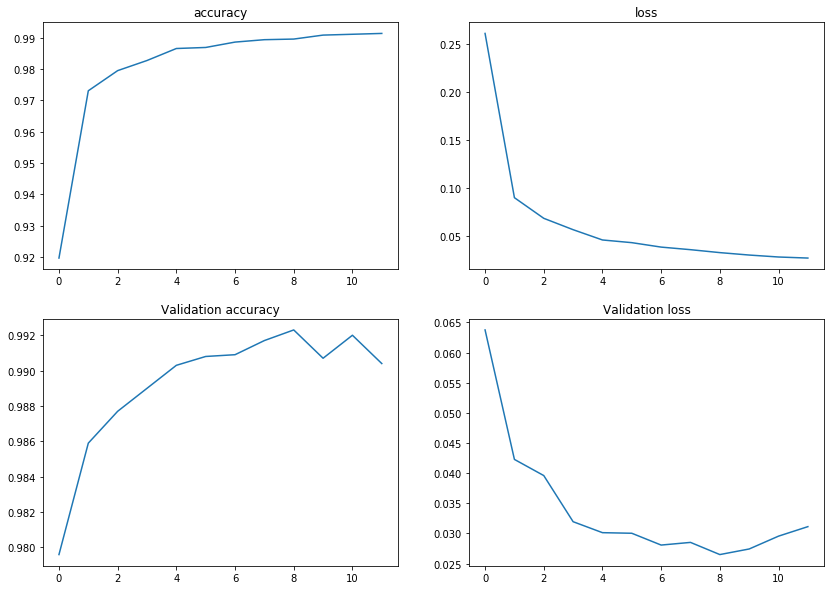

In [15]:
import pandas as pd
import os
import matplotlib.pyplot

normal = ['-acc.csv', '-loss.csv']
validation = ['-val_acc.csv', '-val_loss.csv']
titles = ['accuracy', 'loss']

fig, ax = plt.subplots(2, 2, figsize = (14, 10))
for i, (nfile, vfile) in enumerate(zip(normal, validation)):
    datan, datav = pd.read_csv('data/MNIST/mnist'+nfile), pd.read_csv('data/MNIST/mnist'+vfile)
    xn, xv = datan['Step'], datav['Step']
    yn, yv = datan['Value'], datav['Value']
    ax[0][i].plot(xn,yn)
    ax[0][i].set_title(titles[i])
    ax[1][i].plot(xv,yv)
    ax[1][i].set_title("Validation "+titles[i])